1. Show the summary statistics of all numerical variables. 

將會使用的套件載入

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math   # This will import math module

In [2]:
pd.options.display.max_columns = None

In [5]:
dataset_return=pd.read_csv('data(return).csv')
dataset_return

,date,2308 (up or down),2308 vloume (thousand),2360 (return),3665 (return),1536 (return),1503 (return),4721 (return),2371 (return),1537 (return),1723 (return),6509 (return),8183 (return),1533 (return),taiwan_index (return),SP500 (return),2308 foreign investment (m),2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd
0,2011/7/19,1,331924,-0.005256,-0.053205,-0.003659,0.008464,-0.010420,0.007634,0.001955,0.026784,0.040461,0.000000,-0.004809,-0.001640,0.016309,11.54,21.32,-11.44,69.160590,74.930837,-1.332766,44.166169,34.477055,25.163434
1,2011/7/20,1,300740,-0.042272,-0.023053,0.007346,0.005595,0.035092,0.030303,-0.005861,0.009317,-0.019444,-0.003878,-0.027372,0.021303,-0.000671,-172.41,5.43,-16.20,69.127465,74.621618,-1.336238,41.206987,54.798299,38.200764
2,2011/7/21,1,490457,-0.009655,0.013270,-0.007292,0.000000,-0.008476,-0.003676,0.007859,0.000000,0.016993,-0.001287,0.001653,0.001260,0.013546,-111.50,5.02,6.79,69.309690,74.334487,-1.218008,46.366737,66.305938,51.860431
3,2011/7/22,0,523839,0.036212,-0.020378,-0.007356,0.005560,0.001706,0.018450,-0.005846,-0.006154,0.000000,-0.022086,0.029754,0.005527,0.000908,-27.07,61.85,40.02,69.624440,74.063922,-0.979355,52.033124,88.528439,69.877559
4,2011/7/25,0,575569,0.025537,0.034176,0.022221,0.006917,0.003412,-0.007246,0.017645,0.034055,0.008358,0.006639,-0.017659,-0.009333,-0.005643,7.67,24.64,57.71,69.806665,73.793355,-0.649065,56.933431,90.952030,81.928802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2020/9/23,0,736007,-0.033742,-0.007968,-0.004951,-0.031312,-0.024926,-0.016077,-0.003572,-0.004287,-0.044572,-0.020359,0.000000,-0.004874,-0.009363,-75.31,-3.85,-42.11,180.747425,182.586002,-0.901260,42.251281,22.592619,42.853993
2261,2020/9/24,0,1008197,-0.015873,-0.016065,-0.013931,-0.021212,-0.022557,0.003268,-0.007168,-0.009689,-0.042599,-0.010388,-0.020134,-0.025390,0.013406,311.73,-98.58,-140.60,180.243820,182.865785,-1.130129,41.502154,16.111124,26.358002
2262,2020/9/25,1,1574599,-0.019355,-0.055102,-0.059535,-0.022704,-0.043077,-0.013029,-0.007221,-0.016304,-0.050845,-0.028873,-0.015410,-0.002566,0.009082,115.66,-50.14,-161.96,179.404470,182.977697,-1.449606,38.557135,14.930631,17.878125
2263,2020/9/28,1,1573496,-0.006579,-0.025918,-0.037554,-0.010558,-0.049838,0.003300,-0.007272,0.001104,-0.004464,-0.037838,-0.006959,0.018789,-0.003406,102.90,12.71,-247.28,179.092715,183.073623,-2.180784,30.886104,24.851273,18.631009


In [7]:
dataset_stockprice=pd.read_csv('data(price).csv')
dataset_stockprice

,date,2308 (up or down),2308 vloume (thousand),2360 (price),3665 (price),1536 (price),1503 (price),4721 (price),2371 (price),1537 (price),1723 (price),6509 (price),8183 (price),1533 (price),taiwan_index (price),SP500 (price),2308 foreign investment (m),2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd
0,2011/7/18,0,505794,54.03,20.35,9.89,24.60,16.97,13.10,24.96,97.19,12.68,6.47,26.24,8538.57,1305.44,-263.49,16.44,46.28,69.36,75.26,-1.41,37.19,25.33,20.62
1,2011/7/19,1,331924,53.75,19.27,9.86,24.81,16.79,13.20,25.01,99.79,13.20,6.47,26.12,8524.57,1326.73,11.54,21.32,-11.44,69.16,74.93,-1.33,44.17,34.48,25.16
2,2011/7/20,1,300740,51.48,18.82,9.93,24.95,17.38,13.60,24.86,100.72,12.94,6.45,25.40,8706.17,1325.84,-172.41,5.43,-16.20,69.13,74.62,-1.34,41.21,54.80,38.20
3,2011/7/21,1,490457,50.98,19.07,9.86,24.95,17.23,13.55,25.06,100.72,13.16,6.44,25.45,8717.14,1343.80,-111.50,5.02,6.79,69.31,74.33,-1.22,46.37,66.31,51.86
4,2011/7/22,0,523839,52.83,18.69,9.78,25.08,17.26,13.80,24.91,100.10,13.16,6.30,26.20,8765.32,1345.02,-27.07,61.85,40.02,69.62,74.06,-0.98,52.03,88.53,69.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,2020/9/23,0,736007,147.15,234.41,95.47,46.62,63.37,15.30,124.02,87.37,23.52,18.52,29.66,12583.88,3155.22,-75.31,-3.85,-42.11,180.75,182.59,-0.90,42.25,22.59,42.85
2262,2020/9/24,0,1008197,144.81,230.65,94.14,45.63,61.94,15.35,123.13,86.52,22.52,18.33,29.06,12264.38,3197.52,311.73,-98.58,-140.60,180.24,182.87,-1.13,41.50,16.11,26.36
2263,2020/9/25,1,1574599,142.01,217.94,88.54,44.59,59.27,15.15,122.25,85.11,21.37,17.80,28.61,12232.91,3226.56,115.66,-50.14,-161.96,179.40,182.98,-1.45,38.56,14.93,17.88
2264,2020/9/28,1,1573496,141.08,212.29,85.21,44.12,56.32,15.20,121.36,85.21,21.28,17.13,28.41,12462.76,3215.57,102.90,12.71,-247.28,179.09,183.07,-2.18,30.89,24.85,18.63


In [46]:
ser1=pd.Series(dataset_stockprice['TWII adjclose'])
ser1
ser2=pd.Series(dataset_stockprice['S&P500 adjclose'])
ser2

0       1,305.44
1       1,326.73
2       1,325.84
3       1,343.80
4       1,345.02
          ...   
2262    3,197.52
2263    3,226.56
2264    3,215.57
2265    3,224.73
2266    3,251.84
Name: S&P500 adjclose, Length: 2267, dtype: object

In [34]:
coll = [0,23,24]
dataset_stockprice = dataset_stockprice.drop(dataset_stockprice.columns[coll], axis = 1) 
dataset_stockprice

,2308 adjclose,2308 vloume (thousand),2360 adjclose,3665 adjclose,1536 adjclose,1503 adjclose,4721 adjclose,2371 adjclose,1537 adjclose,1723 adjclose,6509 adjclose,8183 adjclose,1533 adjclose,2308 foreign investment (m),2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd
0,68.91,505794,54.03,20.35,9.89,24.60,16.97,13.10,24.96,97.19,12.68,6.47,26.24,-263.49,16.44,46.28,69.36,75.26,-1.41,37.19,25.33,20.62
1,67.92,331924,53.75,19.27,9.86,24.81,16.79,13.20,25.01,99.79,13.20,6.47,26.12,11.54,21.32,-11.44,69.16,74.93,-1.33,44.17,34.48,25.16
2,69.24,300740,51.48,18.82,9.93,24.95,17.38,13.60,24.86,100.72,12.94,6.45,25.40,-172.41,5.43,-16.20,69.13,74.62,-1.34,41.21,54.80,38.20
3,70.90,490457,50.98,19.07,9.86,24.95,17.23,13.55,25.06,100.72,13.16,6.44,25.45,-111.50,5.02,6.79,69.31,74.33,-1.22,46.37,66.31,51.86
4,72.56,523839,52.83,18.69,9.78,25.08,17.26,13.80,24.91,100.10,13.16,6.30,26.20,-27.07,61.85,40.02,69.62,74.06,-0.98,52.03,88.53,69.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,175.54,1008197,144.81,230.65,94.14,45.63,61.94,15.35,123.13,86.52,22.52,18.33,29.06,311.73,-98.58,-140.60,180.24,182.87,-1.13,41.50,16.11,26.36
2263,169.31,1574599,142.01,217.94,88.54,44.59,59.27,15.15,122.25,85.11,21.37,17.80,28.61,115.66,-50.14,-161.96,179.40,182.98,-1.45,38.56,14.93,17.88
2264,175.06,1573496,141.08,212.29,85.21,44.12,56.32,15.20,121.36,85.21,21.28,17.13,28.41,102.90,12.71,-247.28,179.09,183.07,-2.18,30.89,24.85,18.63
2265,177.46,1049264,142.01,206.64,86.45,45.01,57.75,15.50,121.80,85.68,21.42,17.61,28.56,431.98,-56.76,-62.96,178.83,183.23,-2.27,42.30,41.52,27.10


In [37]:
ser1=pd.DataFrame(ser1)
ser2=pd.DataFrame(ser2)

In [42]:
dataset_stockprice=pd.concat([dataset_stockprice,ser1,ser2],axis=1)
dataset_stockprice

,2308 adjclose,2308 vloume (thousand),2360 adjclose,3665 adjclose,1536 adjclose,1503 adjclose,4721 adjclose,2371 adjclose,1537 adjclose,1723 adjclose,6509 adjclose,8183 adjclose,1533 adjclose,2308 foreign investment (m),2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd,TWII adjclose,S&P500 adjclose
0,68.91,505794,54.03,20.35,9.89,24.60,16.97,13.10,24.96,97.19,12.68,6.47,26.24,-263.49,16.44,46.28,69.36,75.26,-1.41,37.19,25.33,20.62,"8,538.57","1,305.44"
1,67.92,331924,53.75,19.27,9.86,24.81,16.79,13.20,25.01,99.79,13.20,6.47,26.12,11.54,21.32,-11.44,69.16,74.93,-1.33,44.17,34.48,25.16,"8,524.57","1,326.73"
2,69.24,300740,51.48,18.82,9.93,24.95,17.38,13.60,24.86,100.72,12.94,6.45,25.40,-172.41,5.43,-16.20,69.13,74.62,-1.34,41.21,54.80,38.20,"8,706.17","1,325.84"
3,70.90,490457,50.98,19.07,9.86,24.95,17.23,13.55,25.06,100.72,13.16,6.44,25.45,-111.50,5.02,6.79,69.31,74.33,-1.22,46.37,66.31,51.86,"8,717.14","1,343.80"
4,72.56,523839,52.83,18.69,9.78,25.08,17.26,13.80,24.91,100.10,13.16,6.30,26.20,-27.07,61.85,40.02,69.62,74.06,-0.98,52.03,88.53,69.88,"8,765.32","1,345.02"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,175.54,1008197,144.81,230.65,94.14,45.63,61.94,15.35,123.13,86.52,22.52,18.33,29.06,311.73,-98.58,-140.60,180.24,182.87,-1.13,41.50,16.11,26.36,"12,264.38","3,197.52"
2263,169.31,1574599,142.01,217.94,88.54,44.59,59.27,15.15,122.25,85.11,21.37,17.80,28.61,115.66,-50.14,-161.96,179.40,182.98,-1.45,38.56,14.93,17.88,"12,232.91","3,226.56"
2264,175.06,1573496,141.08,212.29,85.21,44.12,56.32,15.20,121.36,85.21,21.28,17.13,28.41,102.90,12.71,-247.28,179.09,183.07,-2.18,30.89,24.85,18.63,"12,462.76","3,215.57"
2265,177.46,1049264,142.01,206.64,86.45,45.01,57.75,15.50,121.80,85.68,21.42,17.61,28.56,431.98,-56.76,-62.96,178.83,183.23,-2.27,42.30,41.52,27.10,"12,467.73","3,224.73"


In [12]:
dataset_return.head()

,date,2308 adjclose,2308 vloume (thousand),2360 adjclose,3665 adjclose,1536 adjclose,1503 adjclose,4721 adjclose,2371 adjclose,1537 adjclose,1723 adjclose,6509 adjclose,8183 adjclose,1533 adjclose,2308 foreign investment (m) adjclose,2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd,TWII adjclose,S&P500 adjclose
0,2011/7/19,67.9182,331924,-0.005256,-0.053205,-0.003659,0.008464,-0.010420,0.007634,0.001955,0.026784,0.040461,0.000000,-0.004809,11.54,21.32,-11.44,69.160590,74.930837,-1.332766,44.166169,34.477055,25.163434,-0.001640,0.016309
1,2011/7/20,69.2435,300740,-0.042272,-0.023053,0.007346,0.005595,0.035092,0.030303,-0.005861,0.009317,-0.019444,-0.003878,-0.027372,-172.41,5.43,-16.20,69.127465,74.621618,-1.336238,41.206987,54.798299,38.200764,0.021303,-0.000671
2,2011/7/21,70.9000,490457,-0.009655,0.013270,-0.007292,0.000000,-0.008476,-0.003676,0.007859,0.000000,0.016993,-0.001287,0.001653,-111.50,5.02,6.79,69.309690,74.334487,-1.218008,46.366737,66.305938,51.860431,0.001260,0.013546
3,2011/7/22,72.5566,523839,0.036212,-0.020378,-0.007356,0.005560,0.001706,0.018450,-0.005846,-0.006154,0.000000,-0.022086,0.029754,-27.07,61.85,40.02,69.624440,74.063922,-0.979355,52.033124,88.528439,69.877559,0.005527,0.000908
4,2011/7/25,71.5626,575569,0.025537,0.034176,0.022221,0.006917,0.003412,-0.007246,0.017645,0.034055,0.008358,0.006639,-0.017659,7.67,24.64,57.71,69.806665,73.793355,-0.649065,56.933431,90.952030,81.928802,-0.009333,-0.005643


In [13]:
dataset_stockprice.head()

,date,2308 adjclose,2308 vloume (thousand),2360 adjclose,3665 adjclose,1536 adjclose,1503 adjclose,4721 adjclose,2371 adjclose,1537 adjclose,1723 adjclose,6509 adjclose,8183 adjclose,1533 adjclose,2308 foreign investment (m),2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd,TWII adjclose,S&P500 adjclose
0,2011/7/18,68.91,505794,54.03,20.35,9.89,24.60,16.97,13.10,24.96,97.19,12.68,6.47,26.24,-263.49,16.44,46.28,69.36,75.26,-1.41,37.19,25.33,20.62,"8,538.57","1,305.44"
1,2011/7/19,67.92,331924,53.75,19.27,9.86,24.81,16.79,13.20,25.01,99.79,13.20,6.47,26.12,11.54,21.32,-11.44,69.16,74.93,-1.33,44.17,34.48,25.16,"8,524.57","1,326.73"
2,2011/7/20,69.24,300740,51.48,18.82,9.93,24.95,17.38,13.60,24.86,100.72,12.94,6.45,25.40,-172.41,5.43,-16.20,69.13,74.62,-1.34,41.21,54.80,38.20,"8,706.17","1,325.84"
3,2011/7/21,70.90,490457,50.98,19.07,9.86,24.95,17.23,13.55,25.06,100.72,13.16,6.44,25.45,-111.50,5.02,6.79,69.31,74.33,-1.22,46.37,66.31,51.86,"8,717.14","1,343.80"
4,2011/7/22,72.56,523839,52.83,18.69,9.78,25.08,17.26,13.80,24.91,100.10,13.16,6.30,26.20,-27.07,61.85,40.02,69.62,74.06,-0.98,52.03,88.53,69.88,"8,765.32","1,345.02"


In [14]:
coll = 0
dataset_stockprice = dataset_stockprice.drop(dataset_stockprice.columns[coll], axis = 1) 
dataset_return = dataset_return.drop(dataset_return.columns[coll], axis = 1) 

In [15]:
pd.isnull(dataset_stockprice).values.any()

False

In [16]:
pd.isnull(dataset_return).values.any()

False

In [17]:
print(dataset_stockprice.shape)

(2267, 24)


In [18]:
print(dataset_return.shape)

(2266, 24)


Data descriptions

在這些型別中，整數與浮點數欄位都可以進行所有數值的計算，像是當我們使用 df.describe() 方法時，
這兩種數值欄位會自動計算平均數、最大值、最小值、標準差……等統計數值；但字串欄位因為沒有數值意義，
無法進行運算，所以只會回傳出現最多次的字串、出現次數以及欄位中有幾種不同的值，
跟浮點數與整數型別不同，object 型別欄位利用 describe() 的回傳結果
只會有「資料數」、「獨立值數量」、「出現次數最高的值」、「出現率最高的值的出現次數」

In [8]:
dataset_return.describe(include = 'all') 

,date,2308 (up or down),2308 vloume (thousand),2360 (return),3665 (return),1536 (return),1503 (return),4721 (return),2371 (return),1537 (return),1723 (return),6509 (return),8183 (return),1533 (return),taiwan_index (return),SP500 (return),2308 foreign investment (m),2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd
count,2265,2265.000000,2.265000e+03,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000
unique,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011/12/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.447682,8.507052e+05,0.000704,0.001419,0.001219,0.000310,0.000896,0.000400,0.000817,0.000034,0.000461,0.000746,0.000300,0.000213,0.000462,4.405285,-0.209205,-0.433978,117.375014,116.383546,0.339966,51.636837,51.839729,51.833615
std,NaN,0.497365,5.199510e+05,0.023620,0.028141,0.022919,0.009305,0.026773,0.025567,0.015321,0.013442,0.021501,0.024752,0.023030,0.009561,0.011158,288.261781,41.004149,30.967835,30.624899,29.779554,2.257299,11.774578,24.995922,22.897045
min,NaN,0.000000,1.853800e+04,-0.097656,-0.100000,-0.100000,-0.081263,-0.100001,-0.100000,-0.099173,-0.083599,-0.100004,-0.099030,-0.099999,-0.063125,-0.119841,-2106.100000,-482.980000,-338.170000,45.297435,48.155072,-7.401892,10.699493,1.449191,3.915980
25%,NaN,0.000000,5.057380e+05,-0.012245,-0.013672,-0.011450,-0.002816,-0.011390,-0.010163,-0.006645,-0.006993,-0.009783,-0.010307,-0.010152,-0.004302,-0.003305,-138.970000,-9.800000,-9.130000,101.328965,101.571415,-0.979355,43.638775,30.303519,32.803324
50%,NaN,0.000000,7.232180e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000657,0.000582,-0.450000,0.000000,-0.430000,125.376630,125.694712,0.193591,51.490248,52.777240,52.591093
75%,NaN,1.000000,1.055121e+06,0.011765,0.015501,0.012419,0.003636,0.010059,0.009569,0.006969,0.006666,0.008312,0.009123,0.007937,0.005405,0.005128,133.200000,8.510000,7.940000,138.868225,138.735715,1.723890,59.439099,73.013236,70.977210


In [9]:
dataset_stockprice.describe(include = 'all') 

,date,2308 (up or down),2308 vloume (thousand),2360 (price),3665 (price),1536 (price),1503 (price),4721 (price),2371 (price),1537 (price),1723 (price),6509 (price),8183 (price),1533 (price),taiwan_index (price),SP500 (price),2308 foreign investment (m),2308 investment credit (m),2308 dealer (m),MA20,MA60,MACD,RSI,slowk,slowd
count,2266,2266.000000,2.266000e+03,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000
unique,2266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011/12/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.447485,8.505530e+05,81.189748,118.506818,73.466571,31.855613,37.513751,13.281787,80.454342,101.748407,15.639590,10.760084,33.305525,9326.817485,2156.138447,4.287061,-0.201858,-0.413363,117.353866,116.365428,0.339197,51.630556,51.828142,51.819894
std,NaN,0.497344,5.198867e+05,37.519572,68.183576,43.248701,5.827068,26.185755,8.361177,35.391029,16.048198,3.038157,6.114929,12.260910,1391.086695,563.367678,288.253083,40.996588,30.976546,30.634601,29.785425,2.257104,11.775850,24.996629,22.901273
min,NaN,0.000000,1.853800e+04,36.800000,12.520000,7.100000,20.710000,12.540000,4.590000,18.470000,67.870000,7.920000,3.760000,11.940000,6633.330000,1099.230000,-2106.100000,-482.980000,-338.170000,45.300000,48.160000,-7.400000,10.700000,1.450000,3.920000
25%,NaN,0.000000,5.057520e+05,49.847500,74.360000,34.480000,27.130000,16.310000,7.472500,46.340000,86.480000,14.620000,5.232500,25.452500,8191.280000,1727.427500,-139.090000,-9.800000,-9.120000,101.322500,101.540000,-0.980000,43.632500,30.277500,32.800000
50%,NaN,0.000000,7.232025e+05,64.120000,119.630000,88.555000,31.790000,25.285000,9.520000,88.325000,99.960000,16.140000,7.860000,35.720000,9206.690000,2089.435000,-0.705000,0.000000,-0.430000,125.365000,125.670000,0.190000,51.475000,52.740000,52.570000
75%,NaN,1.000000,1.054666e+06,120.400000,177.590000,111.390000,35.500000,59.902500,18.600000,110.335000,115.100000,17.210000,16.340000,39.415000,10517.982500,2663.912500,133.070000,8.525000,7.955000,138.870000,138.737500,1.720000,59.425000,72.987500,70.972500


2. Identify categorical and continuous variables. 

幫助我們理解該變數是 continuous (numerical) 還是 discrete (categorical)

age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week為continuous variables，其他為categorical variables

In [77]:
print(dataset.dtypes) 

2308 adjclose                  float64
2308 vloume (thousand)           int64
2308 foreign investment (m)    float64
2308 investment credit (m)     float64
2308 dealer (m)                float64
MA20                           float64
MA60                           float64
MACD                           float64
RSI                            float64
slowk                          float64
slowd                          float64
2360 return                    float64
3665 return                    float64
1536 return                    float64
1503 return                    float64
4721 return                    float64
2371 return                    float64
1537 return                    float64
1723 return                    float64
6509 return                    float64
8183 return                    float64
1533 return                    float64
dtype: object


判斷每個變數有幾種不同的值

In [78]:
print(dataset.nunique()) 

2308 adjclose                   875
2308 vloume (thousand)         2266
2308 foreign investment (m)    2230
2308 investment credit (m)     1752
2308 dealer (m)                1826
MA20                           2164
MA60                           2233
MACD                           2266
RSI                            2013
slowk                          2218
slowd                          2266
2360 return                    2059
3665 return                    2053
1536 return                    1935
1503 return                    1626
4721 return                    2040
2371 return                    1949
1537 return                    1654
1723 return                    1522
6509 return                    1821
8183 return                    1997
1533 return                    2012
dtype: int64


4. Draw bar plots for each categorical variable. 

以下這些圖表現出分配圖，可分成兩個版本，如下

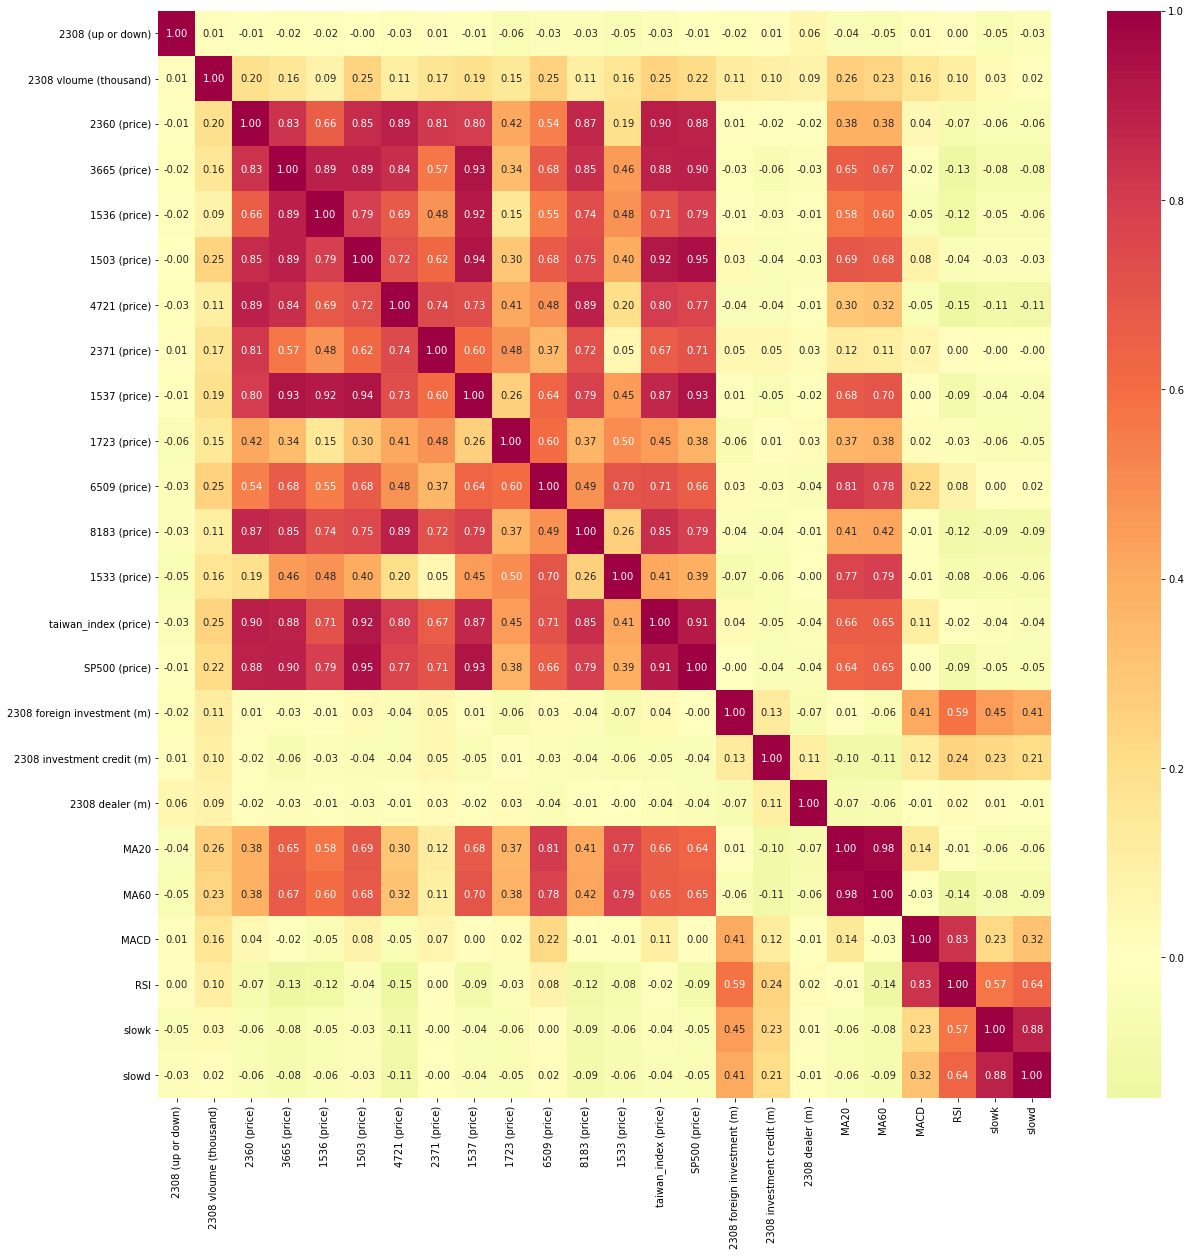

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset_stockprice.corr(), annot = True, fmt='.2f',center=0.0, cmap='Spectral_r'); # cmap="YlGnBu",
plt.savefig("機器學習報告heatmap_dataset_stockprice.png")
plt.show()

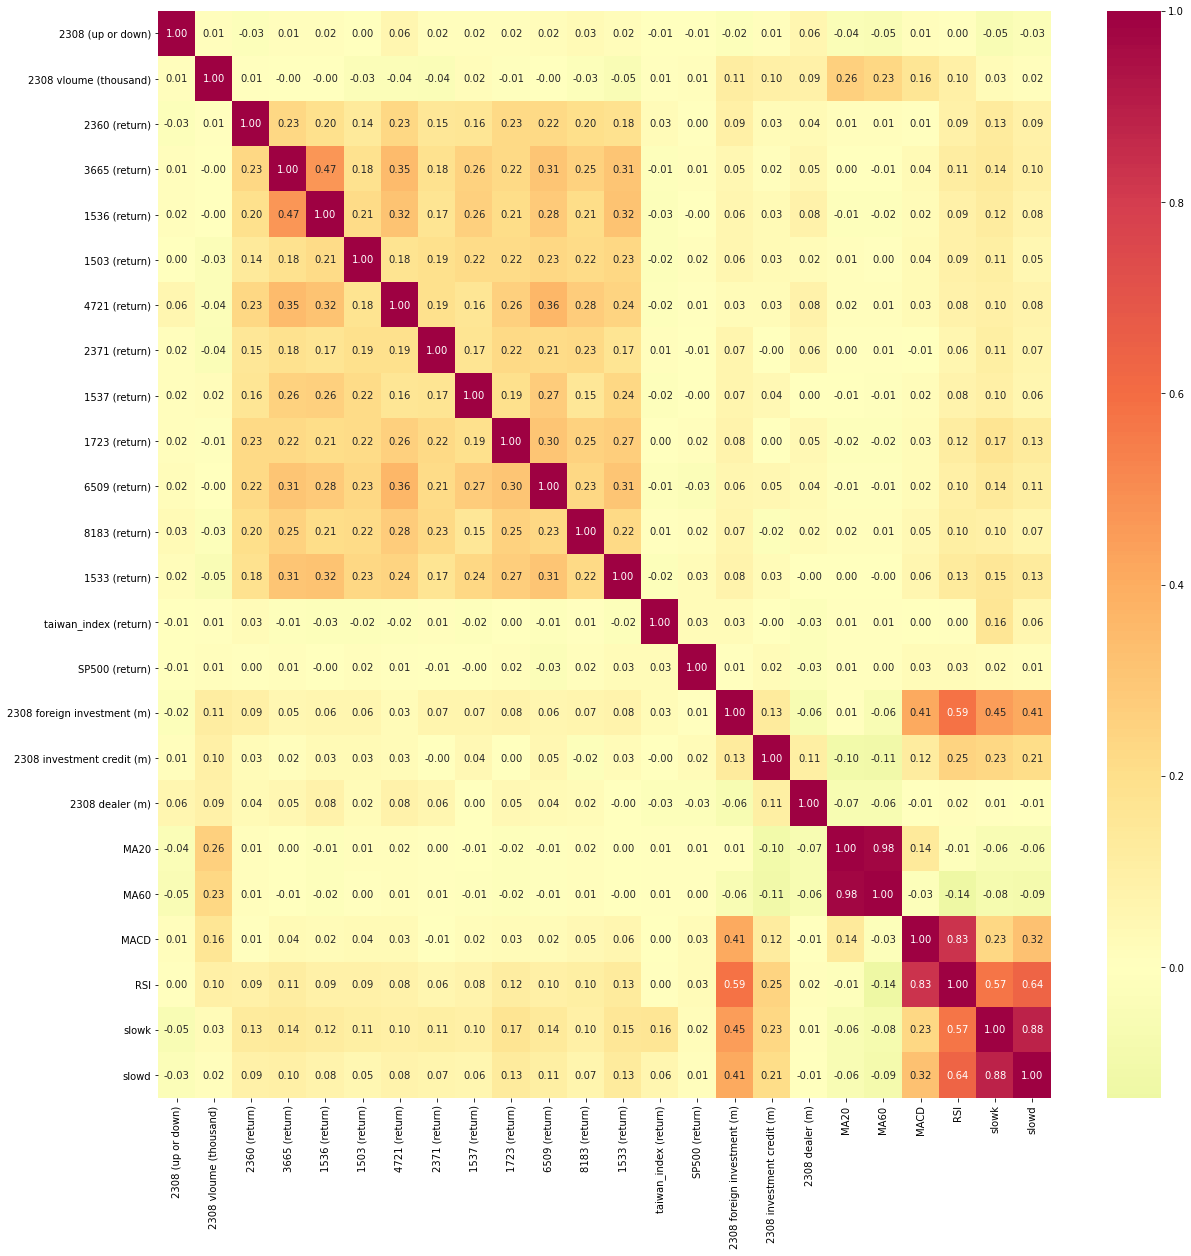

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset_return.corr(), annot = True, fmt='.2f',center=0.0, cmap='Spectral_r'); # cmap="YlGnBu",
plt.savefig("機器學習報告heatmap_dataset_return.png")
plt.show()